## Transfer Learning: Inception

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nihal\Anaconda3\envs\gpuenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../data/kidneyData.csv", index_col=0)

In [3]:
df.head()

,image_id,path,diag,target,Class
0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


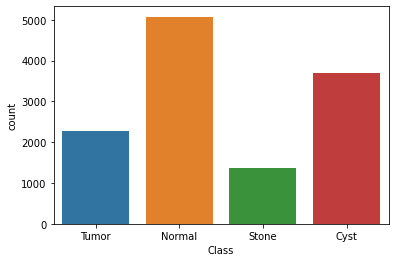

In [4]:
sns.countplot(x='Class', data=df);

In [5]:
import os
import tensorflow as tf

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (244, 244)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range = 0.2,
                                   vertical_flip=True,
                                   horizontal_flip = True,
                                   fill_mode="reflect",
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/',
    target_size=IMG_SIZE,
    subset='training',
    class_mode='categorical', 
    batch_size = 16)

validation_generator = train_datagen.flow_from_directory(
    '../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/',
    target_size=IMG_SIZE,
    subset='validation',
    class_mode='categorical', 
    batch_size = 16)

Found 9959 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


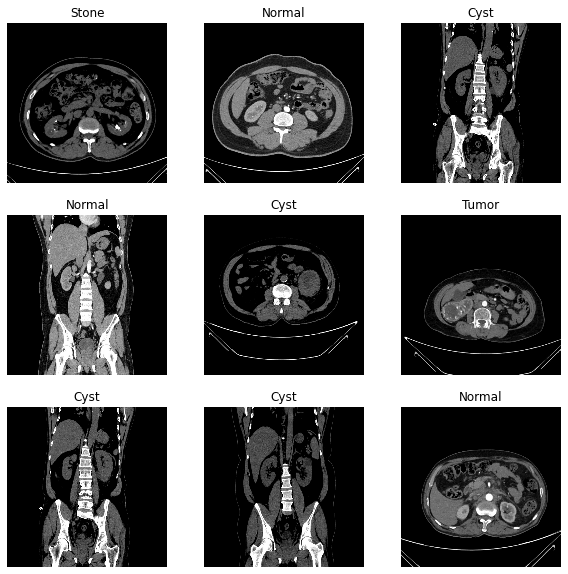

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 1, 0, 1, 0, 3, 0, 0, 1, 2, 1, 0, 3, 0, 2, 3, 0, 2, 3, 0, 1, 1,
       1, 1, 1, 0, 3, 0, 3, 1, 2, 2])>

In [11]:
images[i].shape

TensorShape([160, 160, 3])

In [24]:
base_model.trainable = False

In [25]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 121, 121, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 121, 121, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 28, 28, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 28, 28, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 28, 28, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 28, 28, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 28, 28, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 28, 28, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 28, 28, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 28, 28, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 13, 13, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 13, 13, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 13, 13, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 13, 13, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 13, 13, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 13, 13, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 13, 13, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 13, 13, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 13, 13, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 13, 13, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 13, 13, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 13, 13, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 13, 13, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 13, 13, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 13, 13, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 13, 13, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 13, 13, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 13, 13, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 13, 13, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 13, 13, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 6, 6, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 6, 6, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 6, 6, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [17]:
prediction_layer = tf.keras.layers.Dense(4, activation = 'softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 4)


In [10]:
base_model = tf.keras.applications.Xception(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), include_top=False)
for layer in base_model.layers:
    base_model.trainable = False
    
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.10)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(4, activation = 'softmax')(x)
Xception_model = tf.keras.Model(base_model.input, x)

In [11]:
Xception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 121, 121, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 121, 121, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

 block4_sepconv1_bn (BatchNorma  (None, 30, 30, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 30, 30, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 30, 30, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 30, 30, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 15, 15, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 15, 15, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 15, 15, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 15, 15, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_19 (Add)                   (None, 15, 15, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 15, 15, 728)  0          ['add_19[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 15, 15, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 15, 15, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 15, 15, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 15, 15, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_22 (A

In [12]:
len(Xception_model.trainable_variables)

6

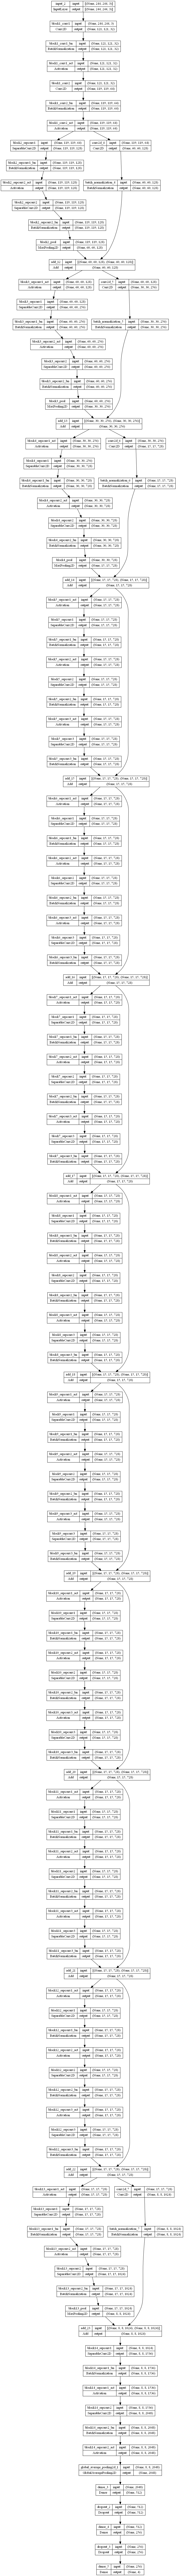

In [14]:
tf.keras.utils.plot_model(Xception_model, to_file='Xception.png', show_shapes=True)

In [15]:
Xception_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = Xception_model.fit(train_generator,
                             epochs=10,
                             validation_data=validation_generator)

Epoch 1/10
623/623 [==============================] - 194s 303ms/step - loss: 0.5814 - accuracy: 0.7722 - val_loss: 0.9798 - val_accuracy: 0.5999
Epoch 2/10
623/623 [==============================] - 285s 457ms/step - loss: 0.3498 - accuracy: 0.8653 - val_loss: 0.9978 - val_accuracy: 0.6454
Epoch 3/10
623/623 [==============================] - 251s 402ms/step - loss: 0.2707 - accuracy: 0.8957 - val_loss: 1.0441 - val_accuracy: 0.6429
Epoch 4/10
623/623 [==============================] - 276s 444ms/step - loss: 0.2275 - accuracy: 0.9164 - val_loss: 1.4197 - val_accuracy: 0.6184
Epoch 5/10
623/623 [==============================] - 220s 353ms/step - loss: 0.2026 - accuracy: 0.9241 - val_loss: 1.2546 - val_accuracy: 0.6152
Epoch 6/10
623/623 [==============================] - 271s 436ms/step - loss: 0.1789 - accuracy: 0.9338 - val_loss: 1.1456 - val_accuracy: 0.6413
Epoch 7/10
623/623 [==============================] - 191s 307ms/step - loss: 0.1635 - accuracy: 0.9401 - val_loss: 1.6254 -

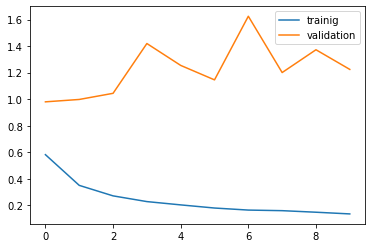

In [17]:
plt.plot(history.history['loss'], label="trainig")
plt.plot(history.history['val_loss'], label="validation")
plt.legend()

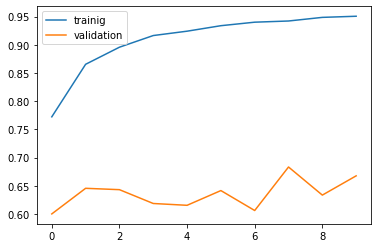

In [18]:
plt.plot(history.history['accuracy'], label="trainig")
plt.plot(history.history['val_accuracy'], label="validation")
plt.legend()

In [19]:
def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224,224])
    return image

def normalize_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm

def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="ocean")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "ocean")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "ocean" )
    plt.axis("off")

In [20]:
tumor_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1001).jpg')
cyst_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg')
stone_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (1002).jpg')
normal_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1002).jpg')

In [21]:
tumor_img = tf.image.resize(tumor_img, size=IMG_SIZE)
cyst_img = tf.image.resize(cyst_img, size=IMG_SIZE)
stone_img = tf.image.resize(stone_img, size=IMG_SIZE)
normal_img = tf.image.resize(normal_img, size=IMG_SIZE)

Tumor

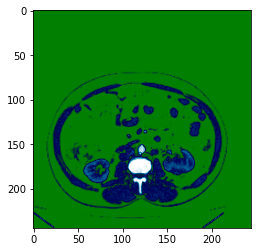

In [22]:
img = tf.reshape(tumor_img, shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [23]:
result = inception_model(tumor_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(tumor_img)
    result = inception_model(tumor_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, tumor_img)

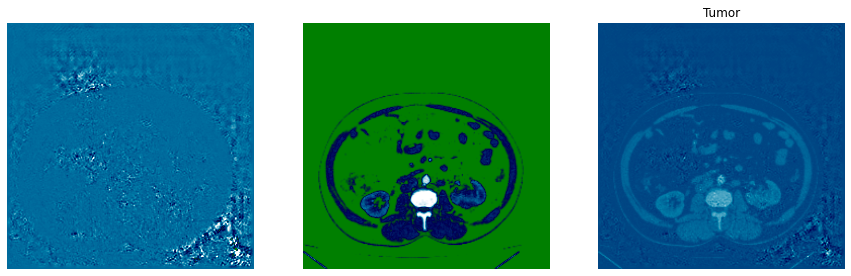

In [24]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Tumor");

Cyst

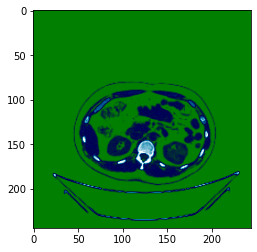

In [25]:
img = tf.reshape(cyst_img, shape=(IMG_SIZE[0], IMG_SIZE[0], 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [26]:
result = inception_model(cyst_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(cyst_img)
    result = inception_model(cyst_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, cyst_img)

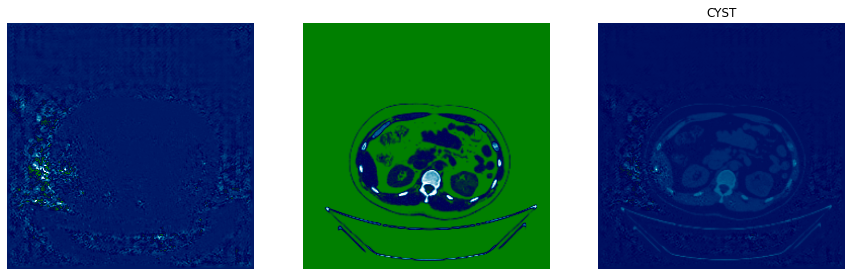

In [27]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("CYST");

Stone

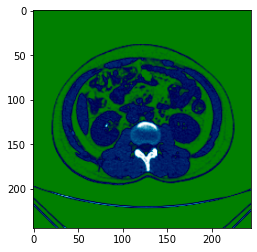

In [28]:
img = tf.reshape(stone_img, shape=(IMG_SIZE[0], IMG_SIZE[0], 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [29]:
result = inception_model(stone_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(stone_img)
    result = inception_model(stone_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, stone_img)

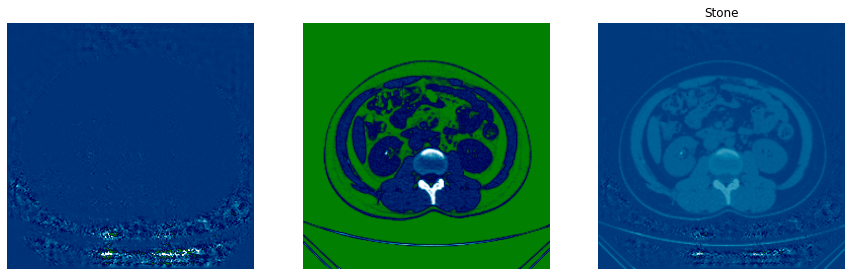

In [30]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Stone");

Normal

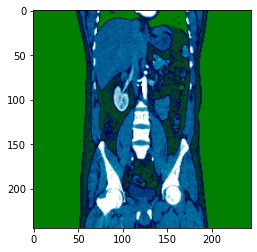

In [31]:
img = tf.reshape(normal_img, shape=(IMG_SIZE[0], IMG_SIZE[0], 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [32]:
result = inception_model(normal_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(normal_img)
    result = inception_model(normal_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, normal_img)

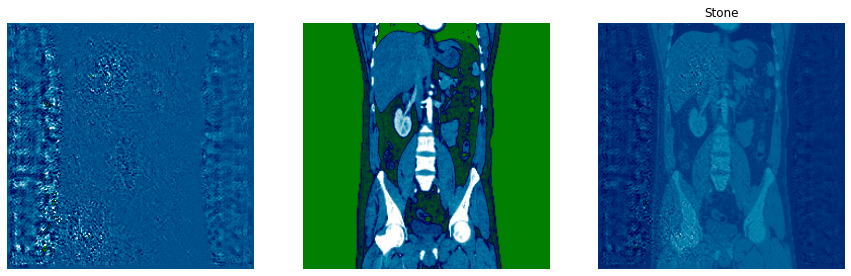

In [33]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Stone");